In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

In [3]:
Year = pd.read_csv('../input/year_prediction.csv')
Year.head()

,label,TimbreAvg1,TimbreAvg2,TimbreAvg3,TimbreAvg4,TimbreAvg5,TimbreAvg6,TimbreAvg7,TimbreAvg8,TimbreAvg9,...,TimbreCovariance69,TimbreCovariance70,TimbreCovariance71,TimbreCovariance72,TimbreCovariance73,TimbreCovariance74,TimbreCovariance75,TimbreCovariance76,TimbreCovariance77,TimbreCovariance78
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


In [4]:
#Data inspection and cleaning

In [5]:
Year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515345 entries, 0 to 515344
Data columns (total 91 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   label               515345 non-null  int64  
 1   TimbreAvg1          515345 non-null  float64
 2   TimbreAvg2          515345 non-null  float64
 3   TimbreAvg3          515345 non-null  float64
 4   TimbreAvg4          515345 non-null  float64
 5   TimbreAvg5          515345 non-null  float64
 6   TimbreAvg6          515345 non-null  float64
 7   TimbreAvg7          515345 non-null  float64
 8   TimbreAvg8          515345 non-null  float64
 9   TimbreAvg9          515345 non-null  float64
 10  TimbreAvg10         515345 non-null  float64
 11  TimbreAvg11         515345 non-null  float64
 12  TimbreAvg12         515345 non-null  float64
 13  TimbreCovariance1   515345 non-null  float64
 14  TimbreCovariance2   515345 non-null  float64
 15  TimbreCovariance3   515345 non-nul

In [6]:
Year.label.describe()

count    515345.000000
mean       1998.397082
std          10.931046
min        1922.000000
25%        1994.000000
50%        2002.000000
75%        2006.000000
max        2011.000000
Name: label, dtype: float64

In [7]:
Year.label.value_counts()

2007    39404
2006    37534
2005    34952
2008    34760
2009    31038
        ...  
1925        7
1922        6
1933        6
1924        5
2011        1
Name: label, Length: 89, dtype: int64

In [8]:
#EDA

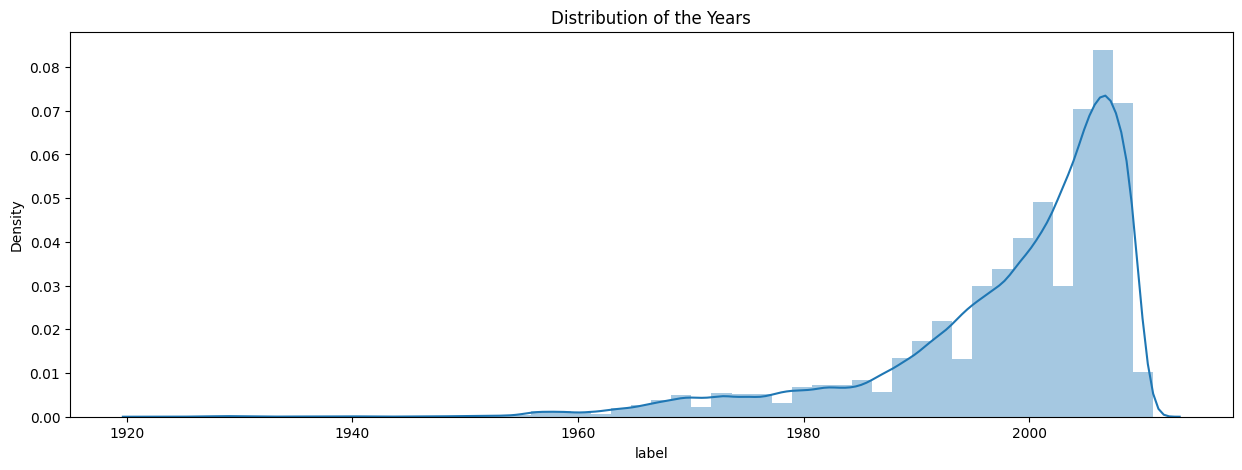

In [9]:
plt.figure(figsize=(15,5))
sns.distplot(Year.label)
plt.title('Distribution of the Years')
plt.show()

In [10]:
#Target variable skewed towards the right since with the dawn of the digital age music creation and sharing has 
#increased exponentially. 

In [11]:
#We will now check the top variable correlations present in the data set.

In [12]:
from scipy.stats import pearsonr

In [13]:
Year_Corr = dict()
for i in Year.columns:
    for j in Year.columns: 
        if i != j:
            if pearsonr(Year[i],Year[j])[0] >= 0.4 or pearsonr(Year[i],Year[j])[0] <= -0.2:
                Year_Corr[i+'_vs_'+j] = pearsonr(Year[i],Year[j])[0]
Year_Corr

{'TimbreAvg1_vs_TimbreAvg2': 0.5617472527420961,
 'TimbreAvg1_vs_TimbreAvg5': -0.2836351404644797,
 'TimbreAvg1_vs_TimbreAvg6': -0.2678200385066954,
 'TimbreAvg1_vs_TimbreCovariance1': -0.35911970043851316,
 'TimbreAvg1_vs_TimbreCovariance2': -0.4384791476126928,
 'TimbreAvg1_vs_TimbreCovariance3': -0.44647945189470295,
 'TimbreAvg1_vs_TimbreCovariance4': -0.37203085005545705,
 'TimbreAvg1_vs_TimbreCovariance5': -0.39101387858137826,
 'TimbreAvg1_vs_TimbreCovariance6': -0.2882879143902892,
 'TimbreAvg1_vs_TimbreCovariance7': -0.43581935496632124,
 'TimbreAvg1_vs_TimbreCovariance8': -0.3185012887961331,
 'TimbreAvg1_vs_TimbreCovariance9': -0.48309075677205887,
 'TimbreAvg1_vs_TimbreCovariance10': -0.29836231197179214,
 'TimbreAvg1_vs_TimbreCovariance11': -0.2510800155212386,
 'TimbreAvg1_vs_TimbreCovariance12': -0.4324027964994073,
 'TimbreAvg1_vs_TimbreCovariance24': -0.3802230454249187,
 'TimbreAvg1_vs_TimbreCovariance34': -0.4070519824301339,
 'TimbreAvg1_vs_TimbreCovariance36': -0.2

In [14]:
Year_Corr_df = pd.DataFrame()
Year_Corr_df['Variable'] = Year_Corr.keys()
Year_Corr_df['Correlation'] = Year_Corr.values()
Year_Corr_df

,Variable,Correlation
0,TimbreAvg1_vs_TimbreAvg2,0.561747
1,TimbreAvg1_vs_TimbreAvg5,-0.283635
2,TimbreAvg1_vs_TimbreAvg6,-0.267820
3,TimbreAvg1_vs_TimbreCovariance1,-0.359120
4,TimbreAvg1_vs_TimbreCovariance2,-0.438479
...,...,...
635,TimbreCovariance71_vs_TimbreCovariance67,-0.489916
636,TimbreCovariance72_vs_TimbreCovariance67,-0.208472
637,TimbreCovariance73_vs_TimbreCovariance76,-0.215873
638,TimbreCovariance76_vs_TimbreCovariance64,-0.209404


In [15]:
Year_Corr_df.sort_values(by='Correlation',ascending=False)
Year_Corr_df.head(20)

,Variable,Correlation
0,TimbreAvg1_vs_TimbreAvg2,0.561747
1,TimbreAvg1_vs_TimbreAvg5,-0.283635
2,TimbreAvg1_vs_TimbreAvg6,-0.267820
3,TimbreAvg1_vs_TimbreCovariance1,-0.359120
4,TimbreAvg1_vs_TimbreCovariance2,-0.438479
5,TimbreAvg1_vs_TimbreCovariance3,-0.446479
6,TimbreAvg1_vs_TimbreCovariance4,-0.372031
7,TimbreAvg1_vs_TimbreCovariance5,-0.391014
8,TimbreAvg1_vs_TimbreCovariance6,-0.288288
9,TimbreAvg1_vs_TimbreCovariance7,-0.435819


In [16]:
#Here we have the top 20 highest correlations among the dataset. 

In [17]:
label_corr = dict()
for i in list(Year.columns):
    if pearsonr(Year['label'],Year[i])[0] >= 0.4 or pearsonr(Year['label'],Year[i])[0] <= -0.2:
        label_corr[i] = pearsonr(Year['label'],Year[i])[0]
label_corr

{'label': 1.0}

In [18]:
label_corr_df = pd.DataFrame()
label_corr_df['Variable'] = label_corr.keys()
label_corr_df['Correlation'] = label_corr.values()
label_corr_df

,Variable,Correlation
0,label,1.0


In [19]:
#As we can see from the 2nd dictionary and data frame there are no correlations with the target variable that are greater than 
#0.4 or less than -0.2 and hence we can say that a linear model would not be very well suited for this problem. 

In [20]:
#Model Building

In [21]:
#Will be first performing PCA on the dataset for the purpose of dimensionality reduction. 

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
X = Year.drop('label',axis=1)
y = Year['label']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.9,random_state=100)

col = X_train.columns
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns=col)

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test,columns=col)

In [25]:
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(random_state=42)

In [26]:
print(len(pca.explained_variance_ratio_))
pca.explained_variance_ratio_

90


array([0.11509888, 0.07790812, 0.05908269, 0.04193843, 0.03750886,
       0.02785143, 0.02359574, 0.0229876 , 0.02094579, 0.02017323,
       0.01914213, 0.01860438, 0.01795661, 0.016911  , 0.0162782 ,
       0.01587638, 0.01514974, 0.01416422, 0.01405834, 0.01350418,
       0.01310675, 0.01260817, 0.01236738, 0.01179078, 0.01155292,
       0.01146151, 0.01109524, 0.01095227, 0.01047827, 0.01008891,
       0.00978087, 0.00944042, 0.00927768, 0.00894433, 0.00841613,
       0.00818835, 0.00804267, 0.00801281, 0.00765976, 0.00750439,
       0.00732581, 0.00719055, 0.00700093, 0.00680522, 0.00661245,
       0.00633611, 0.00628686, 0.00615171, 0.00598   , 0.0058407 ,
       0.0056721 , 0.00550313, 0.00536081, 0.00515497, 0.00501757,
       0.00499076, 0.00485278, 0.004733  , 0.00460899, 0.00437104,
       0.00424975, 0.0041122 , 0.00397558, 0.0039379 , 0.00371951,
       0.00365515, 0.0035191 , 0.00337947, 0.00325692, 0.00317536,
       0.00304071, 0.00291895, 0.00276109, 0.0027356 , 0.00262

In [28]:
'''plt.figure(figsize=(10,5))
sns.lineplot(range(1,91),np.cumsum(pca.explained_variance_ratio_))
plt.show()'''

'plt.figure(figsize=(10,5))\nsns.lineplot(range(1,91),np.cumsum(pca.explained_variance_ratio_))\nplt.show()'

In [29]:
#We can cut off the data at 60 principle components and in that way we can still retain about 90% of the variance in the data.

In [30]:
pca = PCA(n_components = 60)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_train

array([[-3.76823575e+00, -1.39803200e+00,  1.83318311e+00, ...,
         4.31291792e-01,  1.33308593e-01,  3.59107348e-02],
       [-2.94587806e+00, -7.81545301e-02,  1.31316440e+00, ...,
        -3.78838720e-02, -7.58117055e-01,  2.30846296e-03],
       [-8.58182911e-01,  1.77365486e+00, -5.99664206e-01, ...,
        -6.62041537e-02,  9.05242863e-02,  1.78645789e-01],
       ...,
       [-2.58883943e+00, -1.57620985e+00, -4.01260633e-01, ...,
         6.01329481e-01, -2.94889497e-01, -2.79529461e-01],
       [ 5.42983610e+00,  4.79874865e+00,  3.07875498e+00, ...,
         6.90453398e-01,  1.07408782e+00,  2.41557144e-01],
       [-2.20124264e+00,  1.75037547e+00,  2.41332499e-01, ...,
         2.13296221e-01,  7.74674062e-01, -1.78886070e-01]])

In [31]:
col = ['C'+str(i) for i in range(1,61)]

In [32]:
X_train = pd.DataFrame(X_train,columns=col)

In [33]:
X_test = pd.DataFrame(X_test,columns=col)

In [34]:
X_test.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60
0,-1.172388,-0.741240,-0.277435,0.476961,-0.800810,0.409315,-0.386277,-1.425017,-0.932372,0.923243,...,-0.639156,-0.638998,-0.366181,-0.698323,0.991275,0.688269,-0.427346,0.990079,0.126885,-0.084891
1,-3.608704,-1.310749,2.672326,0.949986,-0.805098,1.245875,0.807564,-0.216579,0.598099,-0.900774,...,0.555743,-0.170576,-0.153757,0.614311,-0.275329,1.306179,0.951378,-1.718835,-0.245639,-0.166855
2,-4.160324,-0.874602,1.506379,0.947671,0.782555,-0.171689,0.640400,0.062967,-1.094791,-0.095652,...,0.064733,0.319102,0.282357,0.180377,-0.508457,-0.003517,0.298722,-0.170690,0.064787,0.184244
3,0.769099,3.817372,-1.903857,1.307942,-1.099491,-1.733349,-1.578542,-2.684416,-1.024792,0.337277,...,-0.256215,0.513779,0.022236,-0.633938,-0.256313,0.819494,-0.048013,0.131294,-0.295021,0.283583
4,2.275427,-0.494207,-1.036636,-1.753218,1.648473,2.993101,-2.067758,-0.447193,-1.286271,-0.534830,...,-1.078387,-1.108000,0.012125,-0.084280,-0.155401,0.026721,1.845585,-0.401984,-0.045463,-0.349601


In [35]:
#60 principal components is still quite a bit. Hence once again checking which principal components have the highest correlations 
#with Year. Using X_train and y_train in order to obtain the correlations. 

In [36]:
label_corr = dict()
for i in list(X_train.columns):
    if pearsonr(y_train,X_train[i])[0] >= 0.4 or pearsonr(y_train,X_train[i])[0] <= -0.2:
        label_corr[i] = pearsonr(y_train,X_train[i])[0]
label_corr

{}

In [37]:
label_corr_df = pd.DataFrame()
label_corr_df['Variable'] = label_corr.keys()
label_corr_df['Correlation'] = label_corr.values()
label_corr_df

,Variable,Correlation


In [38]:
#As we can see there are no principal components with correlations greater than 0.4 and less than -0.2 with the target variable. 

In [39]:
#Grouping by Year. 

In [40]:
Year.head()

,label,TimbreAvg1,TimbreAvg2,TimbreAvg3,TimbreAvg4,TimbreAvg5,TimbreAvg6,TimbreAvg7,TimbreAvg8,TimbreAvg9,...,TimbreCovariance69,TimbreCovariance70,TimbreCovariance71,TimbreCovariance72,TimbreCovariance73,TimbreCovariance74,TimbreCovariance75,TimbreCovariance76,TimbreCovariance77,TimbreCovariance78
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


In [41]:
Year = Year.groupby('label').mean()
Year.head()

,TimbreAvg1,TimbreAvg2,TimbreAvg3,TimbreAvg4,TimbreAvg5,TimbreAvg6,TimbreAvg7,TimbreAvg8,TimbreAvg9,TimbreAvg10,...,TimbreCovariance69,TimbreCovariance70,TimbreCovariance71,TimbreCovariance72,TimbreCovariance73,TimbreCovariance74,TimbreCovariance75,TimbreCovariance76,TimbreCovariance77,TimbreCovariance78
label,,,,,,,,,,,,,,,,,,,,,
1922,41.563847,13.908623,14.684642,24.427253,18.752738,11.173280,-5.309713,0.136818,-2.164830,-4.444308,...,0.852160,-117.726955,7.403702,133.977620,7.201512,86.955653,-161.417080,14.144575,29.105555,-13.993552
1924,36.945466,-136.050156,108.086914,12.351610,-7.730282,1.872898,-32.485724,3.362986,14.375366,8.708374,...,26.805278,-103.342922,5.517028,57.540930,-3.644502,-2.221816,-117.479828,-6.521120,17.303896,-2.421044
1925,34.359443,-128.216647,120.177701,19.374040,18.185651,17.011220,-56.728221,7.616783,3.783979,8.838653,...,13.667651,-111.001374,44.301009,13.220950,-24.297050,-45.207436,-345.611747,-0.836293,-268.567001,-13.933473
1926,32.572120,-126.464657,88.917274,7.843321,-5.841375,13.394603,-31.141998,9.859703,-17.412415,4.974054,...,30.622798,-84.588056,66.738752,80.698264,-10.574744,2.554846,7.627443,-5.259586,70.703803,11.884001
1927,31.229186,-110.711278,59.213804,4.108315,-9.538370,9.985781,-21.011090,13.410433,-25.118038,4.396292,...,27.403452,-112.958466,2.670383,42.973123,-8.870979,38.038890,-67.741367,-7.575882,27.108634,0.863580


In [42]:
#performing the same process of measuring correlations that was performed on the ungrouped data. 

In [43]:
label_corr = dict()
for i in list(Year.columns):
    if pearsonr(Year.index,Year[i])[0] >= 0.4 or pearsonr(Year.index,Year[i])[0] <= -0.2:
        label_corr[i] = pearsonr(Year.index,Year[i])[0]

In [44]:
label_corr_df = pd.DataFrame()
label_corr_df['Variable'] = label_corr.keys()
label_corr_df['Correlation'] = label_corr.values()
label_corr_df.sort_values('Correlation',inplace=True,ascending=False)
label_corr_df

,Variable,Correlation
0,TimbreAvg1,0.910608
39,TimbreCovariance35,0.886972
65,TimbreCovariance61,0.880510
1,TimbreAvg2,0.852709
69,TimbreCovariance67,0.829699
...,...,...
44,TimbreCovariance40,-0.861811
52,TimbreCovariance48,-0.864495
55,TimbreCovariance51,-0.871731
33,TimbreCovariance28,-0.878079


In [45]:
#Now as we can see unlike the ungrouped data we have a set of variables that have high negative and positive correlations 
#with the target variable year label. 

In [46]:
#Now we shall take the highest correlated variables and plot them across the target variable year. 

In [47]:
Positive_corr = label_corr_df[label_corr_df.Correlation >= 0.8]
Negative_corr = label_corr_df[label_corr_df.Correlation <= -0.8]

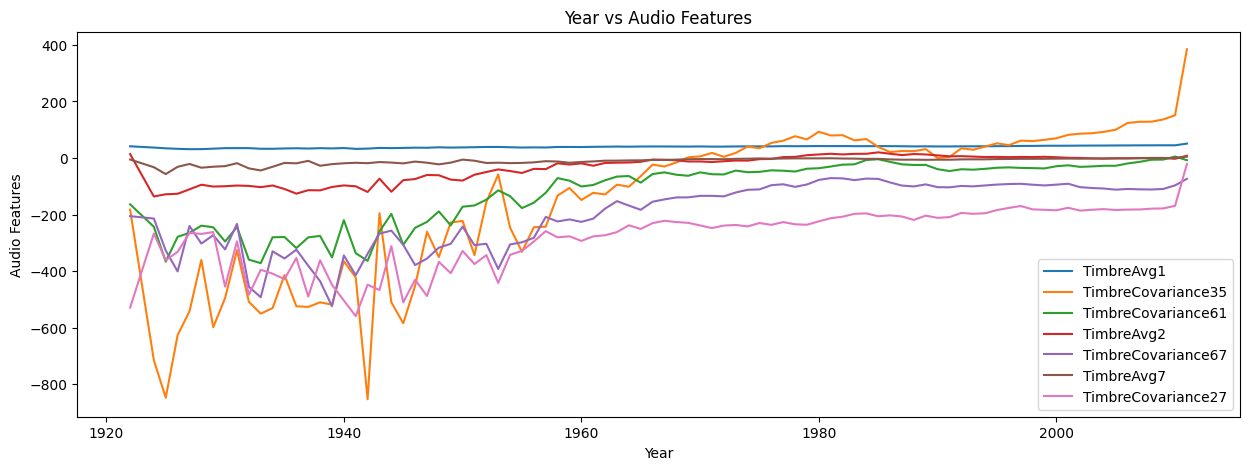

In [48]:
plt.figure(figsize=(15,5))
for i in Positive_corr['Variable']:
    sns.lineplot(x=Year.index,y=Year[i],label=i)
plt.title('Year vs Audio Features')
plt.xlabel('Year')
plt.ylabel('Audio Features')
plt.show()

In [49]:
#As we can see the trend described by the 'TimbreAvg' variables have not be plotted distincly because of the difference in scale.
#Hence plotting them separately.

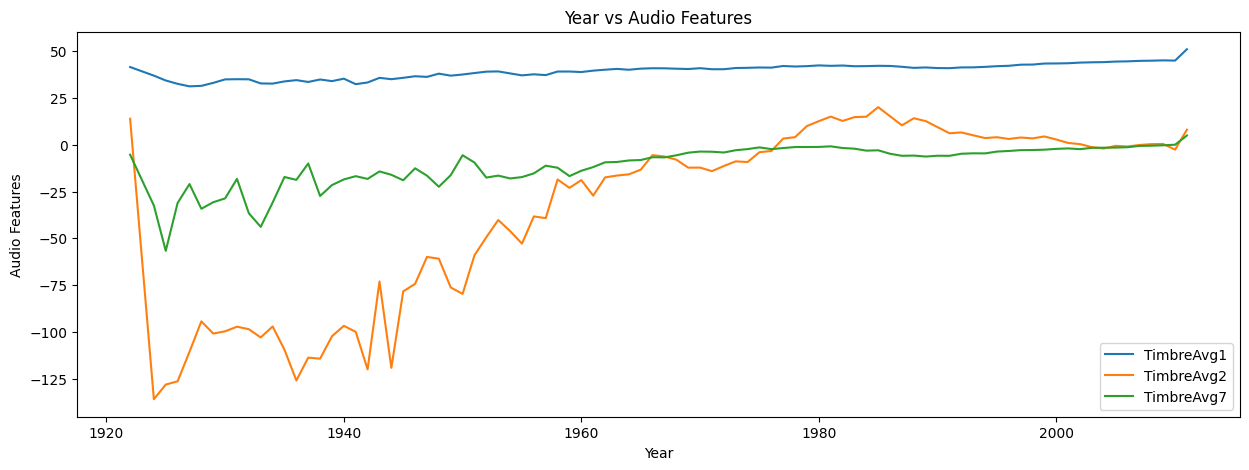

In [50]:
plt.figure(figsize=(15,5))
sns.lineplot(x=Year.index,y=Year['TimbreAvg1'],label='TimbreAvg1')
sns.lineplot(x=Year.index,y=Year['TimbreAvg2'],label='TimbreAvg2')
sns.lineplot(x=Year.index,y=Year['TimbreAvg7'],label='TimbreAvg7')
plt.title('Year vs Audio Features')
plt.xlabel('Year')
plt.ylabel('Audio Features')
plt.show()

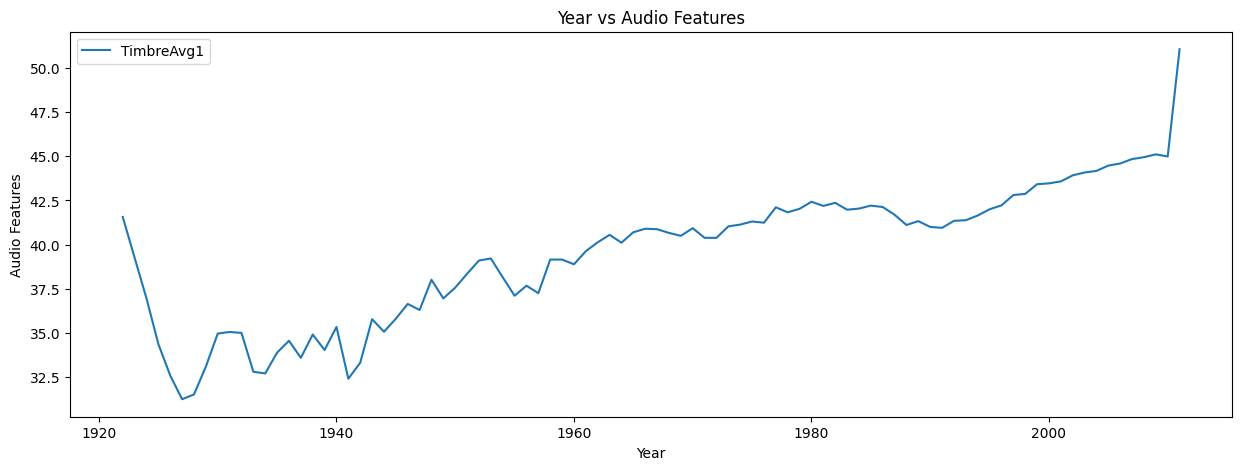

In [51]:
plt.figure(figsize=(15,5))
sns.lineplot(x=Year.index,y=Year['TimbreAvg1'],label='TimbreAvg1')
plt.title('Year vs Audio Features')
plt.xlabel('Year')
plt.ylabel('Audio Features')
plt.show()

In [52]:
#Now we get a good idea of the upward trend of all these variables. Repeating the same for the negative correlations. 

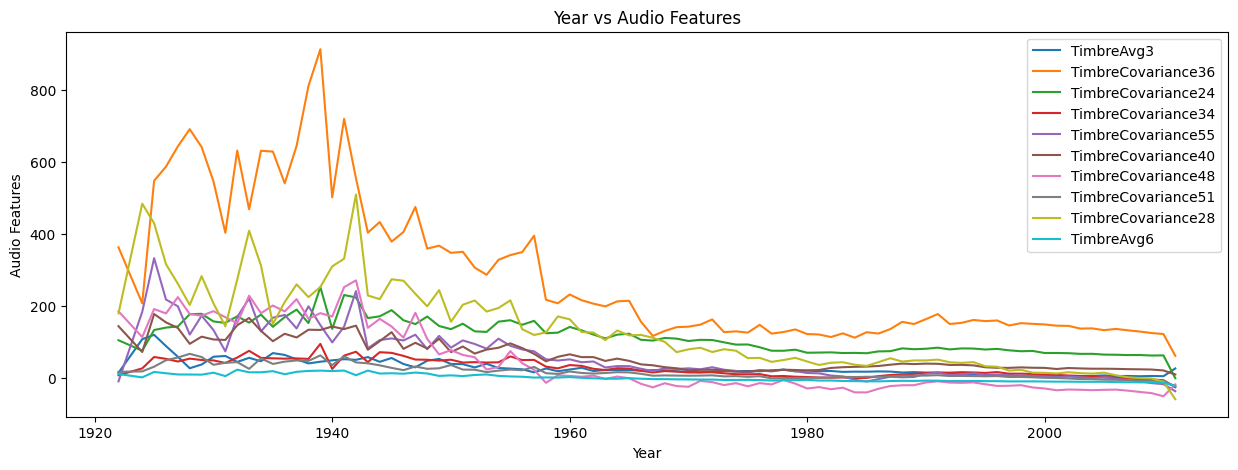

In [53]:
plt.figure(figsize=(15,5))
for i in Negative_corr['Variable']:
    sns.lineplot(x=Year.index,y=Year[i],label=i)
plt.title('Year vs Audio Features')
plt.xlabel('Year')
plt.ylabel('Audio Features')
plt.show()

In [54]:
#Like the previous plots we do not have a good representation of the trend of the 'TimbreAvg' as well as the 'TimbreCovariance34'
#and 'TimbreCovariance51' variables. Hence plotting them separately.

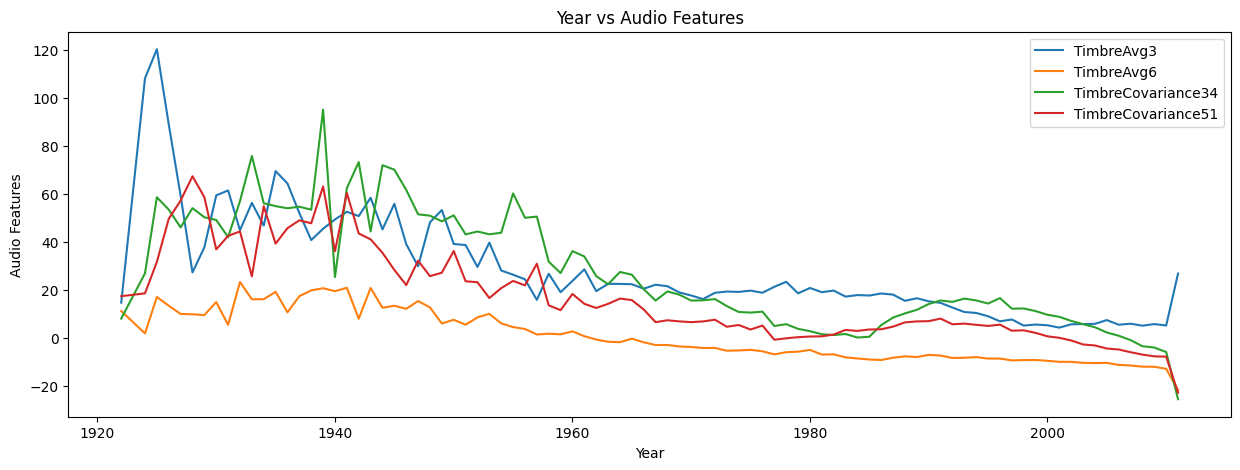

In [55]:
plt.figure(figsize=(15,5))
sns.lineplot(x=Year.index,y=Year['TimbreAvg3'],label='TimbreAvg3')
sns.lineplot(x=Year.index,y=Year['TimbreAvg6'],label='TimbreAvg6')
sns.lineplot(x=Year.index,y=Year['TimbreCovariance34'],label='TimbreCovariance34')
sns.lineplot(x=Year.index,y=Year['TimbreCovariance51'],label='TimbreCovariance51')
plt.title('Year vs Audio Features')
plt.xlabel('Year')
plt.ylabel('Audio Features')
plt.show()

In [56]:
#Now we have a good representation of the trend of all variables. 

In [57]:
Year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 1922 to 2011
Data columns (total 90 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TimbreAvg1          89 non-null     float64
 1   TimbreAvg2          89 non-null     float64
 2   TimbreAvg3          89 non-null     float64
 3   TimbreAvg4          89 non-null     float64
 4   TimbreAvg5          89 non-null     float64
 5   TimbreAvg6          89 non-null     float64
 6   TimbreAvg7          89 non-null     float64
 7   TimbreAvg8          89 non-null     float64
 8   TimbreAvg9          89 non-null     float64
 9   TimbreAvg10         89 non-null     float64
 10  TimbreAvg11         89 non-null     float64
 11  TimbreAvg12         89 non-null     float64
 12  TimbreCovariance1   89 non-null     float64
 13  TimbreCovariance2   89 non-null     float64
 14  TimbreCovariance3   89 non-null     float64
 15  TimbreCovariance4   89 non-null     float64
 16  Timbr

In [58]:
#Repeating the process of PCA.

In [59]:
X = Year
y = Year.index
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.9,random_state=100)

col = X_train.columns
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns=col)

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test,columns=col)

In [60]:
X_train.head()

,TimbreAvg1,TimbreAvg2,TimbreAvg3,TimbreAvg4,TimbreAvg5,TimbreAvg6,TimbreAvg7,TimbreAvg8,TimbreAvg9,TimbreAvg10,...,TimbreCovariance69,TimbreCovariance70,TimbreCovariance71,TimbreCovariance72,TimbreCovariance73,TimbreCovariance74,TimbreCovariance75,TimbreCovariance76,TimbreCovariance77,TimbreCovariance78
0,0.644954,0.938565,-0.432578,0.487707,-0.016232,-0.594857,0.854183,-0.364459,-0.125759,-0.798363,...,-0.586211,1.036433,-0.866018,-0.752886,0.594277,0.321770,-0.189848,0.545317,-0.267859,-0.434282
1,-1.983271,-1.219760,-0.053430,-1.928902,-1.139621,0.846395,-2.017354,1.652680,-1.220716,1.543631,...,1.487583,-0.643663,-1.658243,0.434564,-0.062100,0.215102,0.522558,-3.724437,0.729355,0.434064
2,-0.585561,-0.361050,-0.094724,-1.526332,1.031584,0.352363,-0.543520,0.130739,0.323993,-0.200569,...,0.462400,-2.173831,1.153316,0.127907,-0.274730,0.593470,-0.112192,0.566643,-0.698413,0.274105
3,-1.685690,-1.276212,0.794734,-0.697231,0.387114,1.425924,-1.731072,1.135464,1.218820,2.188707,...,1.759693,-2.906870,-0.297997,0.922008,0.159076,0.493739,-2.749437,-1.929491,2.086552,-0.704167
4,1.181741,0.690098,-0.985517,-0.119456,0.240523,-1.033600,0.822038,-0.759551,-0.044539,-0.450183,...,-0.589389,0.645871,-0.365962,-0.306254,0.821580,-0.071731,0.051241,0.351937,-0.130307,-0.691262


In [61]:
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(random_state=42)

In [62]:
print(len(pca.explained_variance_ratio_))
pca.explained_variance_ratio_

80


array([4.92156727e-01, 1.00262224e-01, 8.67177649e-02, 5.46710998e-02,
       4.12458940e-02, 3.26621136e-02, 2.56507537e-02, 2.06857043e-02,
       1.72863207e-02, 1.65169347e-02, 1.35129471e-02, 1.21907635e-02,
       1.10031574e-02, 1.03376396e-02, 9.15066951e-03, 8.22054872e-03,
       6.68740202e-03, 6.39380936e-03, 5.90849688e-03, 4.37225501e-03,
       3.65794915e-03, 2.92835004e-03, 2.29501765e-03, 2.17083921e-03,
       1.89948044e-03, 1.68827238e-03, 1.41184834e-03, 1.27080872e-03,
       1.17887545e-03, 9.36749690e-04, 7.80473800e-04, 7.29727985e-04,
       5.85950433e-04, 4.32653841e-04, 4.03819420e-04, 3.75087697e-04,
       2.70287893e-04, 2.22383040e-04, 1.91260539e-04, 1.57209139e-04,
       1.40060813e-04, 9.59209864e-05, 9.10638997e-05, 7.18641175e-05,
       4.90937099e-05, 4.51912723e-05, 3.91053098e-05, 3.46268019e-05,
       3.05530967e-05, 2.51794449e-05, 2.15186018e-05, 1.86950239e-05,
       1.80964254e-05, 1.43165350e-05, 1.35828651e-05, 1.12378789e-05,
      

In [63]:
#The original number of variables is 90 and here we get only 80 principal components. 
#This is because as we can see from the variance explained by the last principal component it is very small and tends to 0. 
#Hence we can say that the variance explained by the remaining 10 components that were left out are equal to zero. 

In [65]:
'''plt.figure(figsize=(10,5))
sns.lineplot(range(1,81),np.cumsum(pca.explained_variance_ratio_))
plt.show()'''

'plt.figure(figsize=(10,5))\nsns.lineplot(range(1,81),np.cumsum(pca.explained_variance_ratio_))\nplt.show()'

In [66]:
#Here we get a much steeper plot of cum variance ratios compared to that obtained from the ungrouped data. 
#Selecting 30 pincipal components for the purpose of model building.

In [67]:
pca = PCA(n_components = 30)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_train

array([[-5.38707851, -0.15370145,  0.31631693, ...,  0.37039893,
        -0.27139653, -0.12497638],
       [ 6.47702051, -0.70314285,  5.41460151, ...,  0.87247707,
        -0.31921919, -0.28416483],
       [ 3.39098623,  0.70049514, -4.46905208, ..., -0.20653546,
         0.05117683, -0.3615576 ],
       ...,
       [-4.54530462,  0.14308242,  0.85594921, ..., -0.27742538,
         0.03191512,  0.09775233],
       [ 5.72006013,  0.54699813, -5.19613171, ...,  0.17588426,
        -0.34088669,  0.06860415],
       [ 3.57621277,  0.34711379,  4.5138501 , ...,  0.46118496,
        -0.78763693, -0.31450182]])

In [68]:
col = ['C'+str(i) for i in range(1,31)]

In [69]:
X_train = pd.DataFrame(X_train,columns=col)

In [70]:
X_test = pd.DataFrame(X_test,columns=col)

In [71]:
X_test.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30
0,-5.779734,-0.334143,0.624556,1.352059,0.329680,0.092356,-0.466265,0.558836,1.237177,-0.609750,...,0.330126,-0.113924,0.022389,-0.327136,0.084315,-0.344024,0.184855,0.269978,-0.122348,0.057065
1,-5.254464,0.251865,1.565287,-0.045528,0.210894,-0.196165,-0.394913,0.737169,0.154213,-0.049737,...,0.555815,-0.061199,0.211863,0.411680,0.088929,0.129856,0.204012,-0.147713,-0.100067,0.021474
2,5.520966,1.479516,-3.246021,-3.638187,-1.024154,2.012242,-0.968819,-1.017981,-0.310595,-0.495979,...,-0.926941,0.849673,1.357584,-0.497395,-0.829634,0.459080,-0.597431,0.821836,-0.838447,0.175216
3,1.816487,0.744948,-2.603236,-2.143274,-0.176211,1.063413,-1.130722,1.546298,-0.963327,0.846828,...,-0.574497,1.144798,-0.569628,-0.082060,-0.252978,0.249532,0.529761,0.235266,-0.098203,-0.319255
4,-3.366713,0.693109,-0.444130,-1.497940,0.522686,-0.162228,-0.689257,1.519898,0.002190,0.439551,...,-0.120722,-0.423879,-0.104097,0.129065,-0.094811,0.232004,-0.295111,-0.250078,0.322250,0.176590


In [72]:
#Building a model to predict the Year using the Audii Features

In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [74]:
Model = RandomForestRegressor(random_state=100,n_jobs=-1)

params = {'n_estimators':[200],
          'max_depth':[2,4,5,10,15,20,25,30],
          'max_features':[0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7]}

grid_search = GridSearchCV(estimator=Model,param_grid=params,n_jobs=-1,verbose=1,scoring='r2')
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 104 candidates, totalling 520 fits


GridSearchCV(estimator=RandomForestRegressor(n_jobs=-1, random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [2, 4, 5, 10, 15, 20, 25, 30],
                         'max_features': [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4,
                                          0.45, 0.5, 0.55, 0.6, 0.65, 0.7],
                         'n_estimators': [200]},
             scoring='r2', verbose=1)

In [75]:
Model_best = grid_search.best_estimator_

In [76]:
from sklearn.metrics import r2_score

In [77]:
y_train_pred = Model_best.predict(X_train)
y_test_pred = Model_best.predict(X_test)

print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.99102673241841
0.9766591054783915


In [78]:
#As we can see we get good R squared scores on the train and test set. However since the data has been grouped this model will not be 
#useful on instantaneous data. However also trying other models to check this performance. 

In [79]:
from sklearn.ensemble import GradientBoostingRegressor

In [80]:
Model = GradientBoostingRegressor(random_state=100)

params = {'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8],
          'max_depth':[2,4,5,10,20,30,50],
          'max_features':[0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7]}

grid_search = GridSearchCV(estimator=Model,param_grid=params,n_jobs=-1,verbose=1,scoring='r2')
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 616 candidates, totalling 3080 fits


GridSearchCV(estimator=GradientBoostingRegressor(random_state=100), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                           0.8],
                         'max_depth': [2, 4, 5, 10, 20, 30, 50],
                         'max_features': [0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5,
                                          0.55, 0.6, 0.65, 0.7]},
             scoring='r2', verbose=1)

In [81]:
Model_best = grid_search.best_estimator_

In [82]:
y_train_pred = Model_best.predict(X_train)
y_test_pred = Model_best.predict(X_test)

print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

1.0
0.9648321714231772


In [83]:
#Again the train and test accuracies are good however there is a bit of overfitting present. 

In [84]:
#Linear models: Ridge and Lasso regression

In [85]:
from sklearn.linear_model import Ridge, Lasso

In [86]:
Model = Ridge()

params = {'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]}

grid_search = GridSearchCV(estimator=Model,param_grid=params,n_jobs=-1,verbose=1,scoring='r2')
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000]},
             scoring='r2', verbose=1)

In [87]:
Model_best = grid_search.best_estimator_

In [88]:
y_train_pred = Model_best.predict(X_train)
y_test_pred = Model_best.predict(X_test)

print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.9440473733344829
0.8663931773033007


In [89]:
Model = Lasso()

params = {'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]}

grid_search = GridSearchCV(estimator=Model,param_grid=params,n_jobs=-1,verbose=1,scoring='r2')
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000]},
             scoring='r2', verbose=1)

In [90]:
Model_best = grid_search.best_estimator_

In [91]:
y_train_pred = Model_best.predict(X_train)
y_test_pred = Model_best.predict(X_test)

print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.953567236591802
0.9062818605945462


In [92]:
#Again we get good R squared on both the train and test sets albeit with quite a bit of overfitting. However as stated initially
#these models cannot be used with accurate results on instaneous data. 

In [93]:
#However we can use these models for data that has been aggregated for a particular year. 

In [94]:
#We will now cluster the years based on the audio features present

In [95]:
from sklearn.preprocessing import StandardScaler

In [96]:
Year.head()

,TimbreAvg1,TimbreAvg2,TimbreAvg3,TimbreAvg4,TimbreAvg5,TimbreAvg6,TimbreAvg7,TimbreAvg8,TimbreAvg9,TimbreAvg10,...,TimbreCovariance69,TimbreCovariance70,TimbreCovariance71,TimbreCovariance72,TimbreCovariance73,TimbreCovariance74,TimbreCovariance75,TimbreCovariance76,TimbreCovariance77,TimbreCovariance78
label,,,,,,,,,,,,,,,,,,,,,
1922,41.563847,13.908623,14.684642,24.427253,18.752738,11.173280,-5.309713,0.136818,-2.164830,-4.444308,...,0.852160,-117.726955,7.403702,133.977620,7.201512,86.955653,-161.417080,14.144575,29.105555,-13.993552
1924,36.945466,-136.050156,108.086914,12.351610,-7.730282,1.872898,-32.485724,3.362986,14.375366,8.708374,...,26.805278,-103.342922,5.517028,57.540930,-3.644502,-2.221816,-117.479828,-6.521120,17.303896,-2.421044
1925,34.359443,-128.216647,120.177701,19.374040,18.185651,17.011220,-56.728221,7.616783,3.783979,8.838653,...,13.667651,-111.001374,44.301009,13.220950,-24.297050,-45.207436,-345.611747,-0.836293,-268.567001,-13.933473
1926,32.572120,-126.464657,88.917274,7.843321,-5.841375,13.394603,-31.141998,9.859703,-17.412415,4.974054,...,30.622798,-84.588056,66.738752,80.698264,-10.574744,2.554846,7.627443,-5.259586,70.703803,11.884001
1927,31.229186,-110.711278,59.213804,4.108315,-9.538370,9.985781,-21.011090,13.410433,-25.118038,4.396292,...,27.403452,-112.958466,2.670383,42.973123,-8.870979,38.038890,-67.741367,-7.575882,27.108634,0.863580


In [97]:
scaler = StandardScaler()
col = Year.columns
Year_clust = scaler.fit_transform(Year)
Year_clust = pd.DataFrame(Year_clust,columns=col)
Year_clust.head()

,TimbreAvg1,TimbreAvg2,TimbreAvg3,TimbreAvg4,TimbreAvg5,TimbreAvg6,TimbreAvg7,TimbreAvg8,TimbreAvg9,TimbreAvg10,...,TimbreCovariance69,TimbreCovariance70,TimbreCovariance71,TimbreCovariance72,TimbreCovariance73,TimbreCovariance74,TimbreCovariance75,TimbreCovariance76,TimbreCovariance77,TimbreCovariance78
0,0.537260,1.017039,-0.627123,4.592322,3.360657,1.002004,0.503296,-0.176555,-1.189089,-2.556359,...,-1.544621,-0.865564,-1.044555,2.603196,1.949039,2.565360,-2.305435,2.598066,-0.045893,-3.091216
1,-0.658208,-2.155936,3.576107,2.175460,-0.003353,0.114592,-1.945798,0.609625,1.946293,1.996074,...,0.180338,-0.434723,-1.075986,0.237915,0.053532,-0.617937,-1.542541,-2.272517,-0.299023,-1.236478
2,-1.327600,-1.990186,4.120208,3.580954,3.288623,1.559041,-4.130525,1.646227,-0.061425,2.041167,...,-0.692847,-0.664114,-0.429862,-1.133537,-3.555815,-2.152360,-5.503654,-0.932692,-6.430587,-3.081587
3,-1.790248,-1.953116,2.713447,1.273155,0.236586,1.213955,-1.824702,2.192800,-4.079442,0.703544,...,0.434067,0.127035,-0.056059,0.954502,-1.157633,-0.447428,0.629728,-1.975193,0.846336,1.056206
4,-2.137867,-1.619791,1.376750,0.525617,-0.233026,0.888696,-0.911707,3.058073,-5.540131,0.503568,...,0.220095,-0.722735,-1.123410,-0.212876,-0.859874,0.819218,-0.678919,-2.521108,-0.088724,-0.710048


In [98]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [99]:
hopkins(Year_clust)

0.7997325777102186

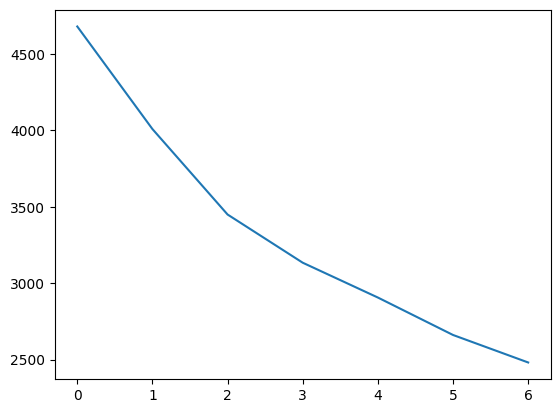

In [100]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(Year_clust)
    
    ssd.append(kmeans.inertia_)
    
plt.plot(ssd)
plt.show()

In [101]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(Year_clust)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(Year_clust, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4714656152386653
For n_clusters=3, the silhouette score is 0.4232147838147539
For n_clusters=4, the silhouette score is 0.42512986245264184
For n_clusters=5, the silhouette score is 0.3956282377639095
For n_clusters=6, the silhouette score is 0.4130937061601717
For n_clusters=7, the silhouette score is 0.41587562968814473
For n_clusters=8, the silhouette score is 0.36115475316416024


In [102]:
#Clustering the Years into 5 clusters

In [103]:
kmeans = KMeans(n_clusters=5,max_iter=100)
kmeans.fit(Year_clust)

KMeans(max_iter=100, n_clusters=5)

In [104]:
Year['Cluster_ID'] = kmeans.labels_
Year.head()

,TimbreAvg1,TimbreAvg2,TimbreAvg3,TimbreAvg4,TimbreAvg5,TimbreAvg6,TimbreAvg7,TimbreAvg8,TimbreAvg9,TimbreAvg10,...,TimbreCovariance70,TimbreCovariance71,TimbreCovariance72,TimbreCovariance73,TimbreCovariance74,TimbreCovariance75,TimbreCovariance76,TimbreCovariance77,TimbreCovariance78,Cluster_ID
label,,,,,,,,,,,,,,,,,,,,,
1922,41.563847,13.908623,14.684642,24.427253,18.752738,11.173280,-5.309713,0.136818,-2.164830,-4.444308,...,-117.726955,7.403702,133.977620,7.201512,86.955653,-161.417080,14.144575,29.105555,-13.993552,4
1924,36.945466,-136.050156,108.086914,12.351610,-7.730282,1.872898,-32.485724,3.362986,14.375366,8.708374,...,-103.342922,5.517028,57.540930,-3.644502,-2.221816,-117.479828,-6.521120,17.303896,-2.421044,3
1925,34.359443,-128.216647,120.177701,19.374040,18.185651,17.011220,-56.728221,7.616783,3.783979,8.838653,...,-111.001374,44.301009,13.220950,-24.297050,-45.207436,-345.611747,-0.836293,-268.567001,-13.933473,3
1926,32.572120,-126.464657,88.917274,7.843321,-5.841375,13.394603,-31.141998,9.859703,-17.412415,4.974054,...,-84.588056,66.738752,80.698264,-10.574744,2.554846,7.627443,-5.259586,70.703803,11.884001,2
1927,31.229186,-110.711278,59.213804,4.108315,-9.538370,9.985781,-21.011090,13.410433,-25.118038,4.396292,...,-112.958466,2.670383,42.973123,-8.870979,38.038890,-67.741367,-7.575882,27.108634,0.863580,2


In [105]:
#Printing the clusters 

In [106]:
print('Cluster 1 :', list(Year[Year.Cluster_ID == 0].index))
print('Cluster 2 :', list(Year[Year.Cluster_ID == 1].index))
print('Cluster 3 :', list(Year[Year.Cluster_ID == 2].index))
print('Cluster 4 :', list(Year[Year.Cluster_ID == 3].index))
print('Cluster 5 :', list(Year[Year.Cluster_ID == 4].index))

Cluster 1 : [1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1960]
Cluster 2 : [1959, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]
Cluster 3 : [1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945]
Cluster 4 : [1924, 1925]
Cluster 5 : [1922]


In [107]:
#We can see that 2 clusters have only 1 and 2 countries present in them. Hence considering n_clusters = 3 in the next trial. 

In [108]:
kmeans = KMeans(n_clusters=3,max_iter=100)
kmeans.fit(Year_clust)

KMeans(max_iter=100, n_clusters=3)

In [109]:
Year['Cluster_ID'] = kmeans.labels_
Year.head()

,TimbreAvg1,TimbreAvg2,TimbreAvg3,TimbreAvg4,TimbreAvg5,TimbreAvg6,TimbreAvg7,TimbreAvg8,TimbreAvg9,TimbreAvg10,...,TimbreCovariance70,TimbreCovariance71,TimbreCovariance72,TimbreCovariance73,TimbreCovariance74,TimbreCovariance75,TimbreCovariance76,TimbreCovariance77,TimbreCovariance78,Cluster_ID
label,,,,,,,,,,,,,,,,,,,,,
1922,41.563847,13.908623,14.684642,24.427253,18.752738,11.173280,-5.309713,0.136818,-2.164830,-4.444308,...,-117.726955,7.403702,133.977620,7.201512,86.955653,-161.417080,14.144575,29.105555,-13.993552,0
1924,36.945466,-136.050156,108.086914,12.351610,-7.730282,1.872898,-32.485724,3.362986,14.375366,8.708374,...,-103.342922,5.517028,57.540930,-3.644502,-2.221816,-117.479828,-6.521120,17.303896,-2.421044,1
1925,34.359443,-128.216647,120.177701,19.374040,18.185651,17.011220,-56.728221,7.616783,3.783979,8.838653,...,-111.001374,44.301009,13.220950,-24.297050,-45.207436,-345.611747,-0.836293,-268.567001,-13.933473,1
1926,32.572120,-126.464657,88.917274,7.843321,-5.841375,13.394603,-31.141998,9.859703,-17.412415,4.974054,...,-84.588056,66.738752,80.698264,-10.574744,2.554846,7.627443,-5.259586,70.703803,11.884001,2
1927,31.229186,-110.711278,59.213804,4.108315,-9.538370,9.985781,-21.011090,13.410433,-25.118038,4.396292,...,-112.958466,2.670383,42.973123,-8.870979,38.038890,-67.741367,-7.575882,27.108634,0.863580,2


In [110]:
#Printing the clusters 

In [111]:
print('Cluster 1 :', list(Year[Year.Cluster_ID == 0].index))
print('Cluster 2 :', list(Year[Year.Cluster_ID == 1].index))
print('Cluster 3 :', list(Year[Year.Cluster_ID == 2].index))

Cluster 1 : [1922, 1959, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]
Cluster 2 : [1924, 1925, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1960]
Cluster 3 : [1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945]


In [112]:
#As we can see most of the years has been fit into 1 cluster. 

In [113]:
# END FOR NOW #